In [32]:
import cPickle
with open('./data/express/pretrain_db_benchmark/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('./data/express/pretrain_db_benchmark/info.pkl', 'rb') as fid:
    info = cPickle.load(fid)
    
w_list = []
h_list = []
for name in namelist:
    item = info[name]
    _,_,w,h = item[1]
    imw, imh = item[2]
    ratio = max(imw/1300., imh/650.)
    w = w/ratio/1300
    h = h/ratio/650
    w_list.append(w)
    h_list.append(h)

(0, 0.15)

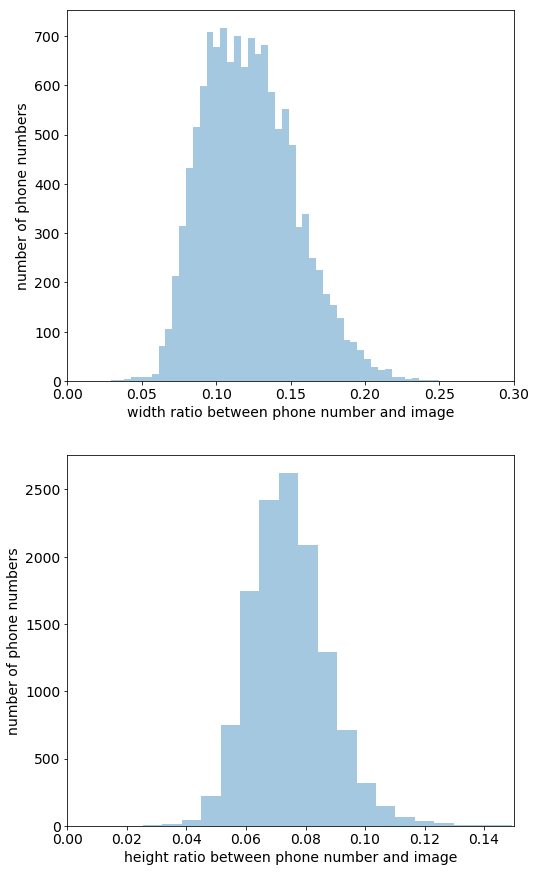

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,15))

a = sns.distplot(w_list, kde=False, ax=ax1)
a.set(xlabel='width ratio between phone number and image', ylabel='number of phone numbers')
a.set_xlim(0,0.3)

b = sns.distplot(h_list, kde=False, ax=ax2)
b.set(xlabel='height ratio between phone number and image', ylabel='number of phone numbers')
b.set_xlim(0,0.15)

In [42]:
## test gt_roidb
## test det
import cPickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

with open('./data/express/pretrain_db_benchmark/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('data/cache/phone_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
with open('output/phone_test/phone_24000.h5/detection_score.pkl', 'rb') as fid:
    det = cPickle.load(fid)

image name:  132817888794_1.jpg
labels:  [1 5 8 1 5 5 5 2 1 1 3]


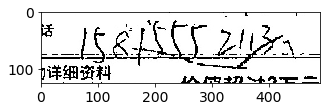

pred:  [1 5 8 1 5 5 5 2 1 1 3]


In [58]:
index = 5
im = np.array(Image.open(os.path.join('data/express/pretrain_db_benchmark/images/',gt_roidb[index]['image'])))
print 'image name: ', gt_roidb[index]['image']
print 'labels: ', gt_roidb[index]['labels']
fig, ax = plt.subplots(1)
ax.imshow(im, cmap='gray')
# plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [5,3]
plt.show()

score = np.vstack(det[index][:12])
length = det[index][-1]
# print length
print 'pred: ', np.argmax(score, axis=1)[:np.argmax(length)+5]

In [1]:
import cPickle
with open('./output/phone_test/phone_16000.h5/phone_right_list.pkl', 'rb') as fid:
    right_list1 = cPickle.load(fid)
with open('./output/phone_test/phone_16000.h5/detection_phone.pkl', 'rb') as fid:
    res_all1 = cPickle.load(fid)
with open('./output/phone_test/phone_20000.h5/phone_right_list.pkl', 'rb') as fid:
    right_list2 = cPickle.load(fid)
with open('./output/phone_test/phone_20000.h5/detection_phone.pkl', 'rb') as fid:
    res_all2 = cPickle.load(fid)
with open('data/cache/phone_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
    
rectified_list = list(set(right_list2) - set(right_list1))

In [2]:
res_all2[2]

[[1, 3, 8, 8, 0, 8, 8, 2, 5, 4, 4]]

image name:  308832162749_1.jpg
labels:  [0 7 5 6 2 6 6 2 9 4 3]
pred1:  [[0, 7, 5, 6, 2, 6, 2, 2, 9, 4, 3]]
pred2:  [[0, 7, 5, 6, 2, 6, 6, 2, 9, 4, 3]]


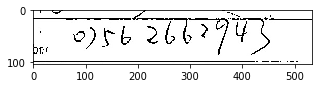

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

index = 17
im = np.array(Image.open(os.path.join('data/express/test_db_benchmark/images/',gt_roidb[rectified_list[index]]['image'])))
print 'image name: ', gt_roidb[rectified_list[index]]['image']
print 'labels: ', gt_roidb[rectified_list[index]]['labels']
print 'pred1: ', res_all1[rectified_list[index]]
print 'pred2: ', res_all2[rectified_list[index]]

fig, ax = plt.subplots(1)
ax.imshow(im, cmap='gray')
plt.rcParams["figure.figsize"] = [5,3]
plt.show()

In [40]:
with open('./output/test_all/phone_all.pkl', 'rb') as fid:
    phone_all, score_all = cPickle.load(fid)
with open('./output/test_all/namelist.pkl', 'rb') as fid:
    namelist = cPickle.load(fid)
with open('./output/test_all/info.pkl', 'rb') as fid:
    info = cPickle.load(fid)

In [43]:
phone_all

2816

In [42]:
with open('./temp/temp.pkl', 'rb') as fid:
    temp = cPickle.load(fid)
len(set(namelist))

1400

In [50]:
with open('data/cache/express_test_gt_roidb.pkl', 'rb') as fid:
    gt_roidb = cPickle.load(fid)
print len(gt_roidb)
a = []
for i in range(len(gt_roidb)):
    a.append(gt_roidb[i]['image'].split('_')[0])
len(a)

1400


1400

In [56]:
res = [1,2,3]
''.join([str(i) for i in res])

'123'

In [73]:
def voteclassifier(res_list, score_list):
    # res_list: [[1,2,3], [...], ...]
    d = {}
    for res, score in zip(res_list, score_list):
        res = ''.join([str(i) for i in res])
        if res in d:
            d[res].append(score)
        else:
            d[res] = [score]
    res, maxinum, score = '', 0, None
    for k,v in d.items():
        if len(v) > maxinum:
            maxinum = len(v)
            res = k
            score = np.mean(v)
    return np.array([int(i) for i in list(res)]), score

voteclassifier([np.array([1,2,3]),np.array([1,2,3]),np.array([1,2])], [1,2,3])

(array([1, 2, 3]), 1.5)

In [65]:
zip([[1,2,3],[1,2,3],[1,2]], [1,2,3])

[([1, 2, 3], 1), ([1, 2, 3], 2), ([1, 2], 3)]

In [70]:
[int(i) for i in list('123')]

[1, 2, 3]

In [82]:
import pandas
import matplotlib.pyplot as plt
import random 
import numpy as np
import matplotlib
a = pandas.read_csv('./output/log.csv')[:800]
b = pandas.read_csv('./output/log1.csv')[:800]


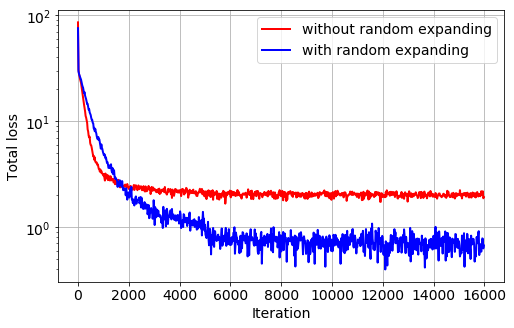

In [87]:
plt.figure()
plt.rcParams["figure.figsize"] = [8,5]
matplotlib.rcParams.update({'font.size': 14})
# plt.title('title here')
plt.xlabel('Iteration')
plt.ylabel('Total loss')
plt.yscale('log')
plt.grid(True)


plt.plot(a['iteration'], a['train/loss'], label = 'without random expanding', color = [1,0,0], linewidth = 2)
plt.plot(b['iteration'], b['train/loss'], label = 'with random expanding', color = [0,0,1], linewidth = 2)

plt.legend(loc='upper right')
plt.show()